# 회귀분석_최적회귀_정규화_tree회귀

## 보스턴 집값 데이터 회귀분석

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [356]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv")

In [357]:
data.head()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [359]:
data.describe()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

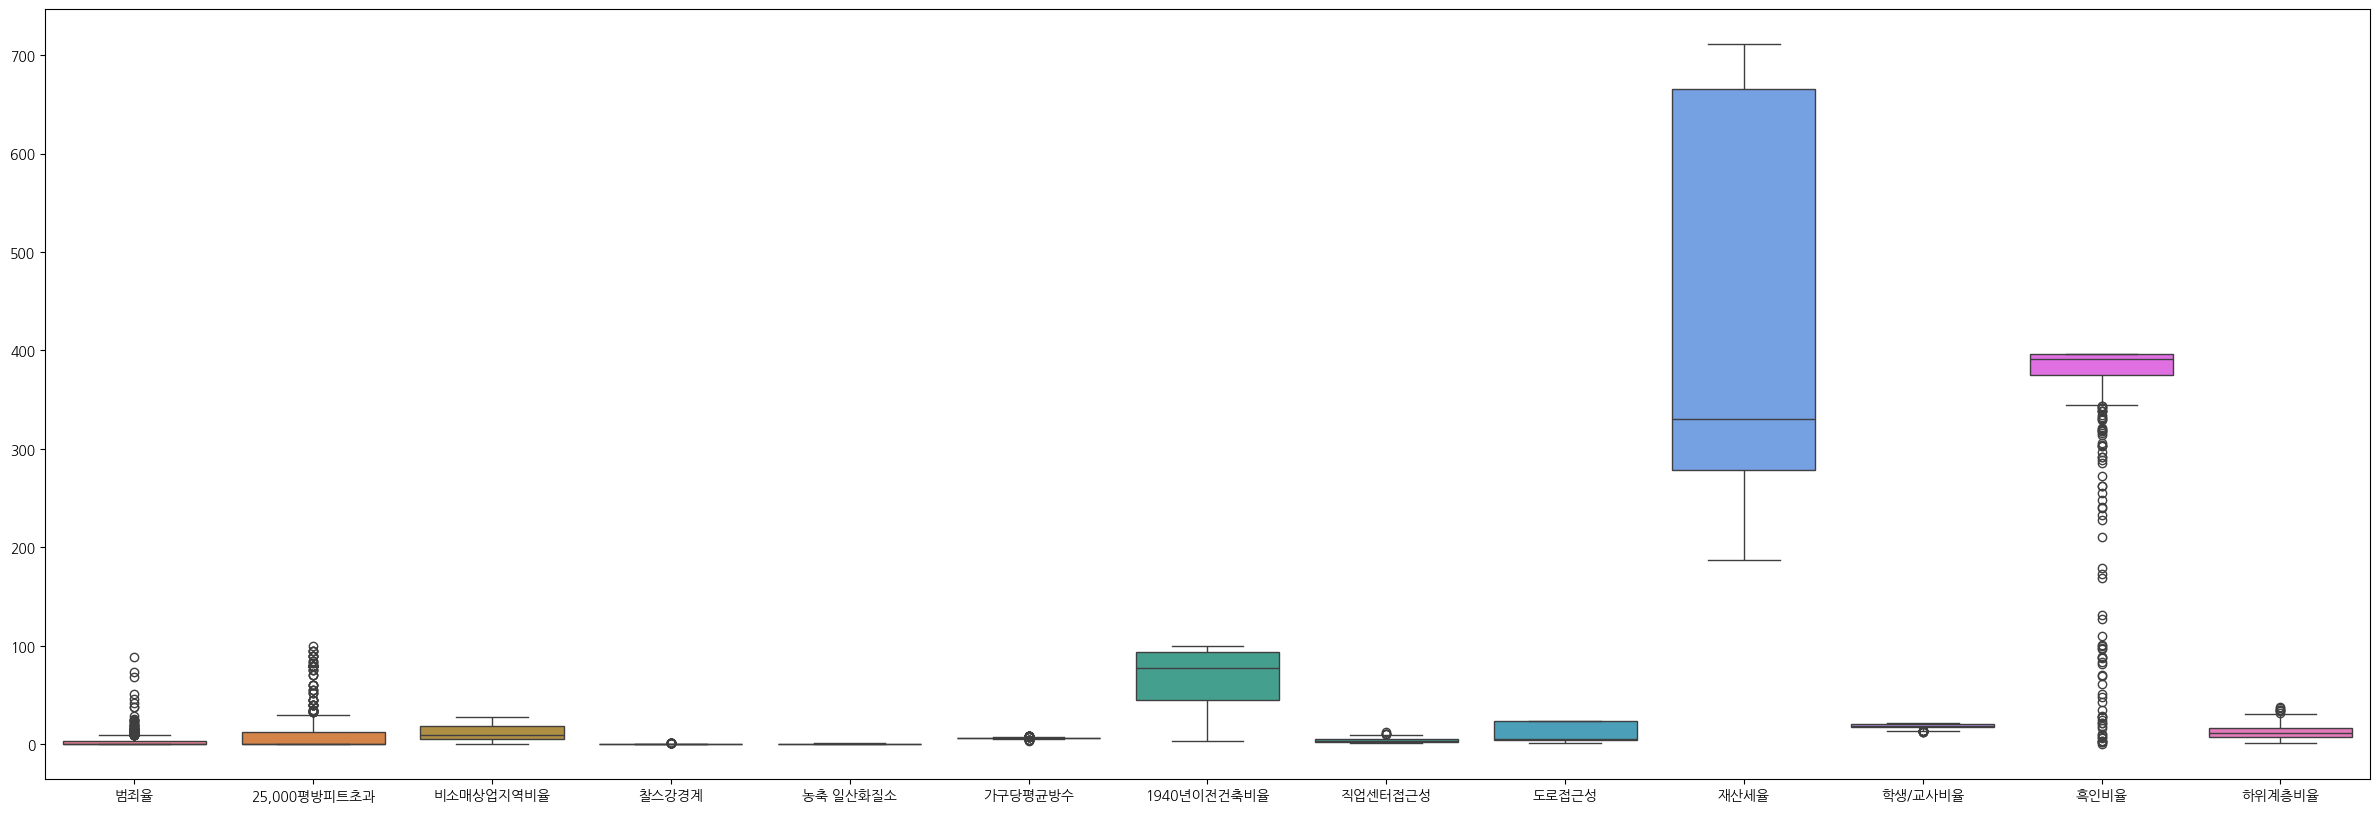

In [219]:
plt.figure(figsize=(30,10))
sns.boxplot(data.drop(['주택가격'], axis=1))

<Axes: >

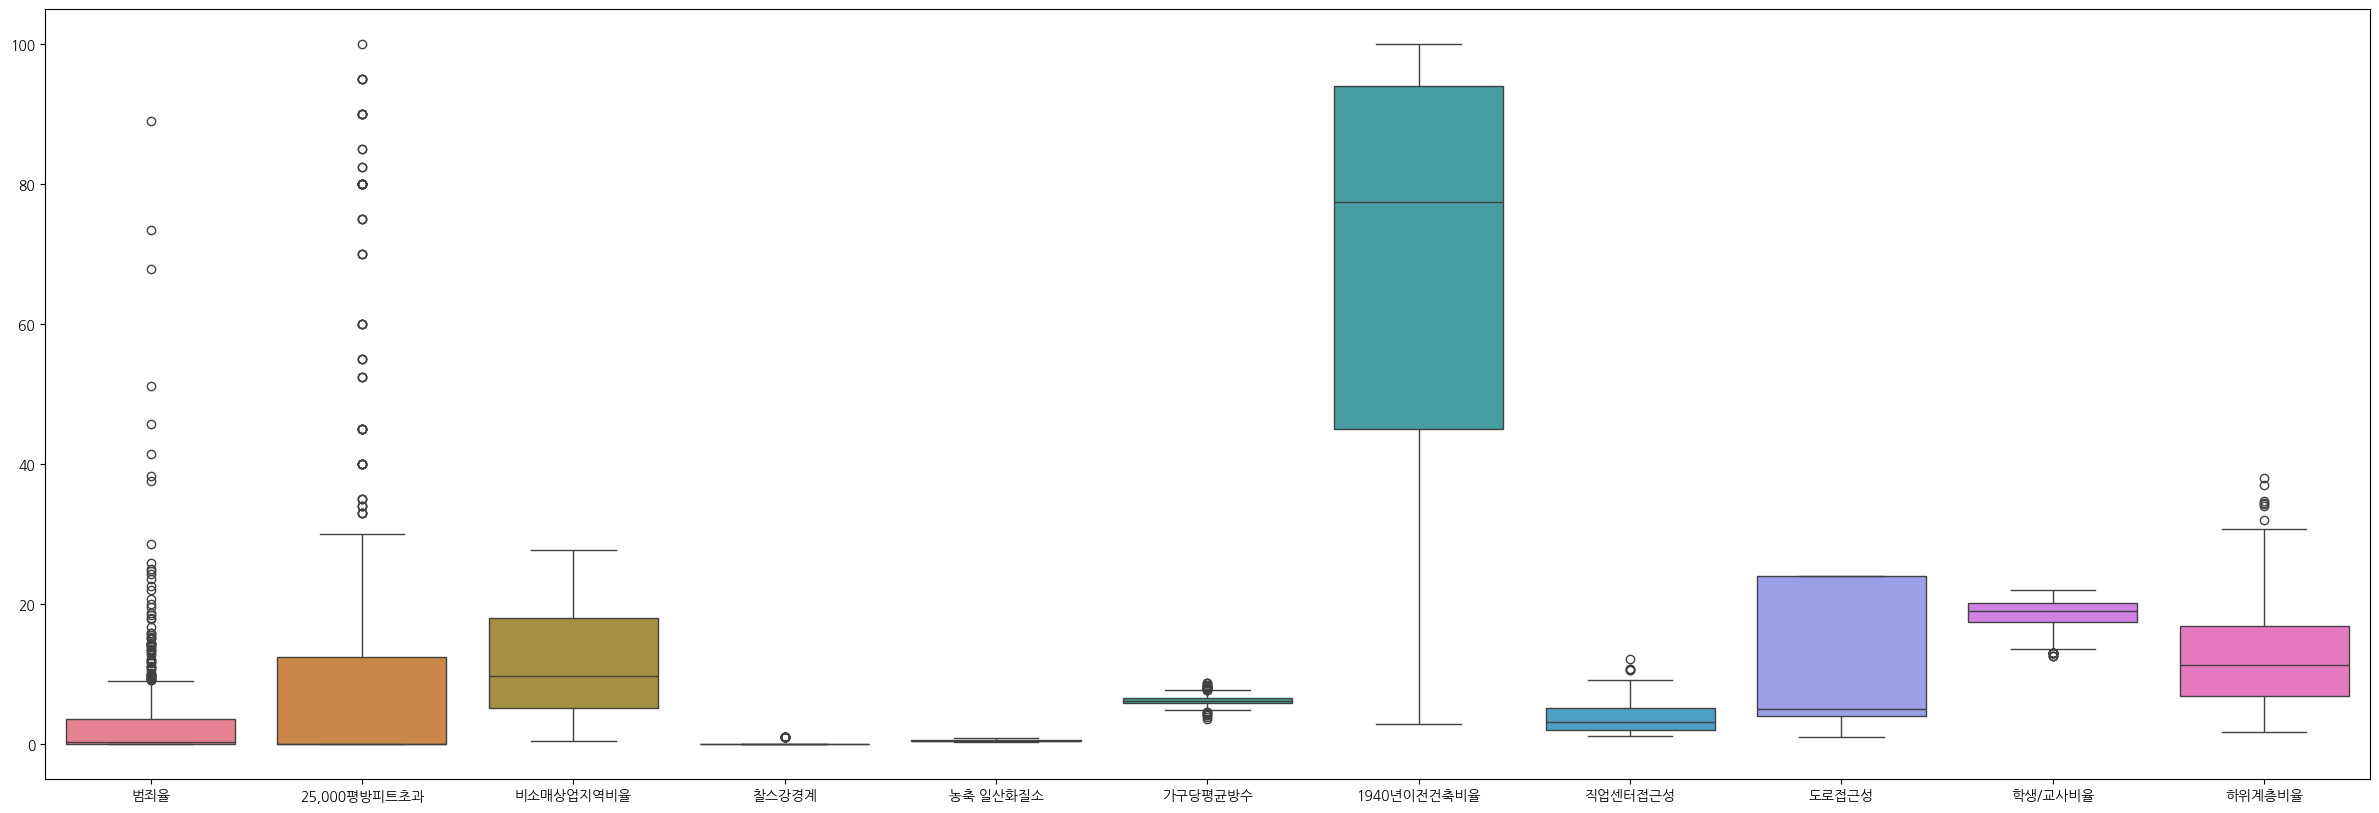

In [220]:
plt.figure(figsize=(30,10))
sns.boxplot(data.drop(['주택가격','재산세율','흑인비율'], axis=1))

============================== 범죄율 ==============================
주택가격
10.4    57.45840
5.0     53.13630
8.8     46.80950
16.3    28.65580
10.9    26.76815
          ...   
33.0     0.01951
32.9     0.01778
44.0     0.01538
32.7     0.01301
32.2     0.00906
Name: 범죄율, Length: 229, dtype: float64


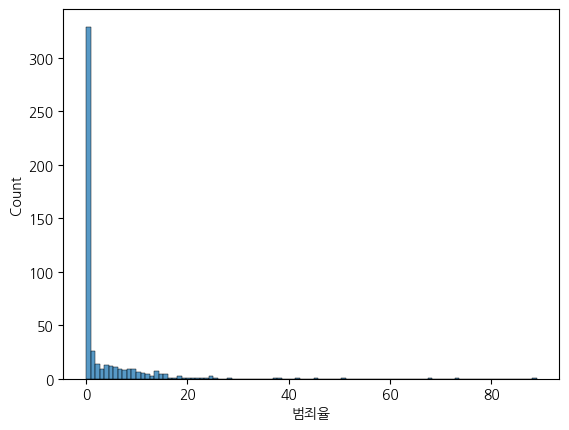

============================== 25,000평방피트초과 ==============================
주택가격
48.5    95.0
32.9    95.0
32.2    90.0
44.0    90.0
42.3    82.5
        ... 
41.3     0.0
43.8     0.0
44.8     0.0
46.7     0.0
48.3     0.0
Name: 25,000평방피트초과, Length: 229, dtype: float64


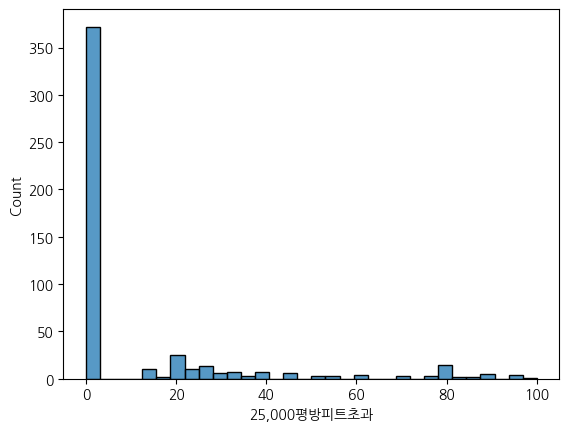

============================== 비소매상업지역비율 ==============================
주택가격
8.1     27.74
17.3    25.65
15.7    25.65
7.0     22.92
18.0    21.89
        ...  
30.3     1.52
33.3     1.52
34.6     1.52
32.9     1.47
33.0     1.38
Name: 비소매상업지역비율, Length: 229, dtype: float64


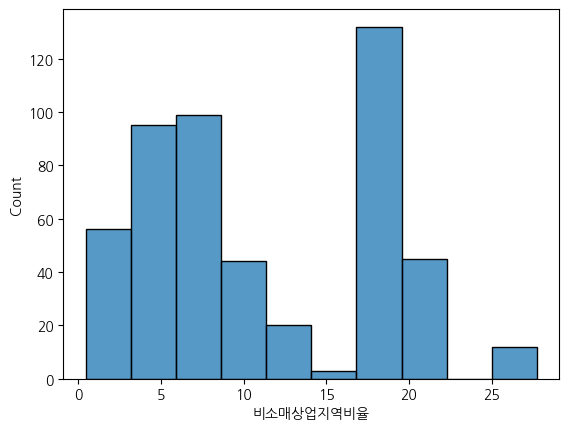

============================== 찰스강경계 ==============================
주택가격
17.0    1.0
15.3    1.0
25.1    1.0
26.7    1.0
27.0    1.0
       ... 
44.8    0.0
46.7    0.0
48.3    0.0
48.5    0.0
48.8    0.0
Name: 찰스강경계, Length: 229, dtype: float64


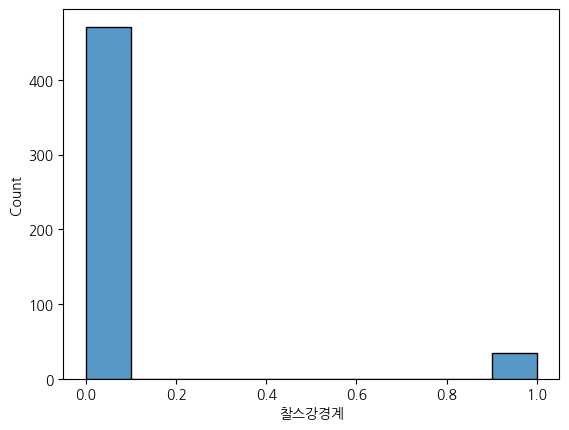

============================== 농축 일산화질소 ==============================
주택가격
17.0    0.8710
15.3    0.8710
15.4    0.8055
11.8    0.8055
15.6    0.7550
         ...  
31.1    0.4010
20.9    0.4005
32.2    0.4000
23.5    0.3980
44.0    0.3940
Name: 농축 일산화질소, Length: 229, dtype: float64


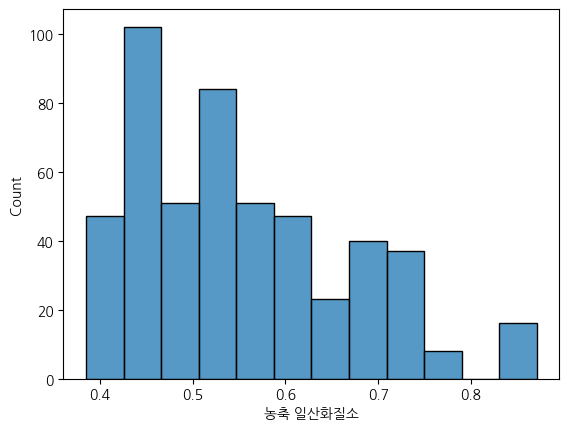

============================== 가구당평균방수 ==============================
주택가격
48.8    8.3980
41.7    8.3370
44.8    8.2660
42.8    8.2590
48.3    8.2470
         ...  
9.7     5.0360
15.3    5.0120
7.4     5.0000
7.0     4.9665
17.9    4.6280
Name: 가구당평균방수, Length: 229, dtype: float64


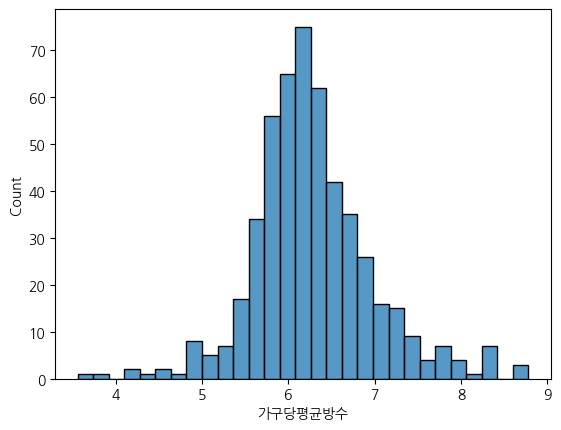

============================== 1940년이전건축비율 ==============================
주택가격
5.0     100.0
5.6     100.0
12.1    100.0
12.3    100.0
8.7     100.0
        ...  
23.4     13.8
31.1      9.9
42.8      8.4
25.3      6.6
24.2      6.6
Name: 1940년이전건축비율, Length: 229, dtype: float64


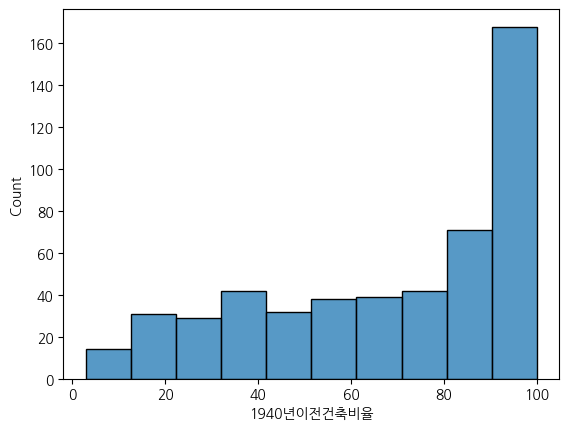

============================== 직업센터접근성 ==============================
주택가격
33.0    9.22290
42.8    8.90670
17.6    7.95490
20.9    7.85915
26.2    7.82650
         ...   
12.3    1.53310
10.4    1.53200
7.4     1.51840
6.3     1.50040
5.0     1.45750
Name: 직업센터접근성, Length: 229, dtype: float64


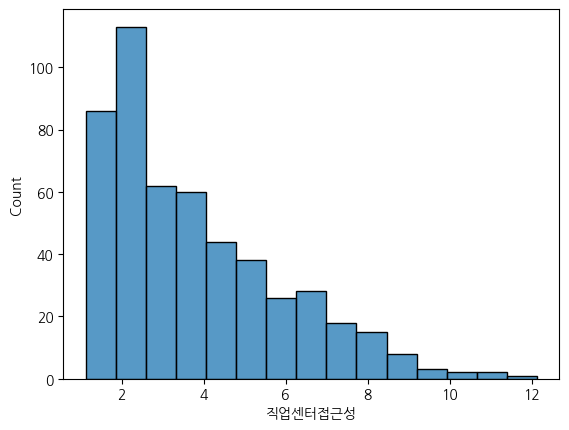

============================== 도로접근성 ==============================
주택가격
5.0     24.0
5.6     24.0
6.3     24.0
7.2     24.0
7.4     24.0
        ... 
34.7     2.0
42.3     2.0
32.2     1.0
31.1     1.0
32.7     1.0
Name: 도로접근성, Length: 229, dtype: float64


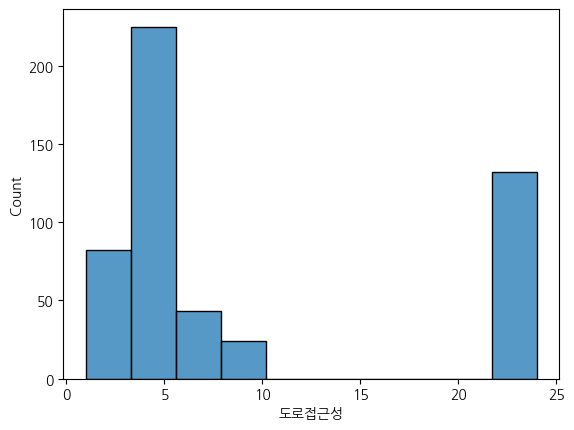

============================== 재산세율 ==============================
주택가격
8.1     711.0
7.0     688.5
5.0     666.0
6.3     666.0
5.6     666.0
        ...  
39.8    193.0
37.2    193.0
37.9    193.0
17.3    188.0
15.7    188.0
Name: 재산세율, Length: 229, dtype: float64


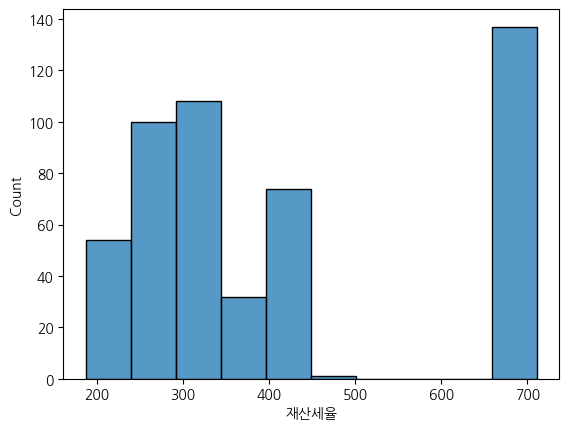

============================== 학생/교사비율 ==============================
주택가격
18.2    21.333333
18.1    21.200000
18.0    21.200000
14.0    21.200000
13.2    21.000000
          ...    
36.0    13.000000
48.8    13.000000
34.6    12.600000
30.3    12.600000
33.3    12.600000
Name: 학생/교사비율, Length: 229, dtype: float64


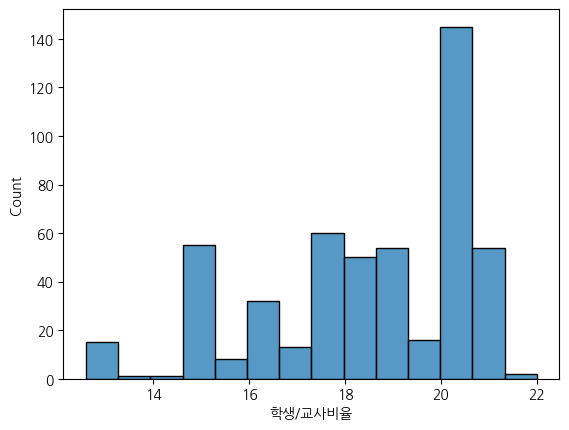

============================== 흑인비율 ==============================
주택가격
5.6     396.90
12.8    396.90
11.5    396.90
9.7     396.90
7.4     396.90
         ...  
11.7     52.14
17.9     28.79
9.6      27.49
7.5      21.57
8.7       9.32
Name: 흑인비율, Length: 229, dtype: float64


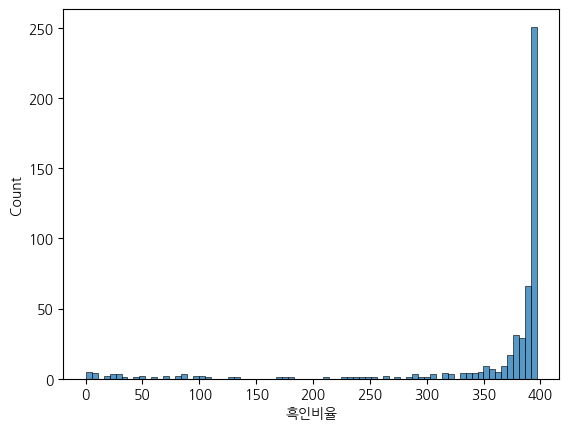

============================== 하위계층비율 ==============================
주택가격
17.9    34.370
14.4    32.610
7.4     31.990
7.0     30.475
6.3     29.970
         ...  
42.3     3.110
44.0     3.110
46.0     3.010
36.4     2.870
41.7     2.470
Name: 하위계층비율, Length: 229, dtype: float64


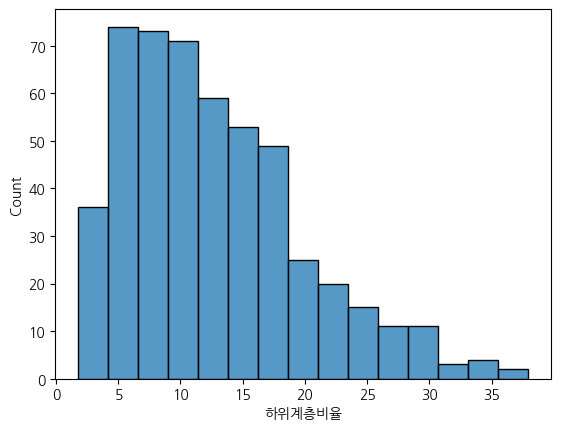

============================== 주택가격 ==============================
주택가격
50.0    50.0
48.8    48.8
48.5    48.5
48.3    48.3
46.7    46.7
        ... 
7.2      7.2
7.0      7.0
6.3      6.3
5.6      5.6
5.0      5.0
Name: 주택가격, Length: 229, dtype: float64


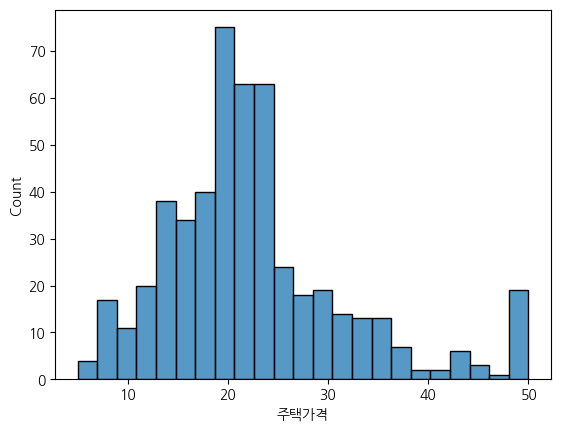

In [15]:
for i in data.columns:
    print('='*30,i,'='*30)
    sns.histplot(data[i])
    print(data.groupby('주택가격')[i].mean().sort_values(ascending=False))
    plt.show()

In [221]:
data.corr()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
범죄율,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
"25,000평방피트초과",-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
비소매상업지역비율,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
찰스강경계,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
농축 일산화질소,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
가구당평균방수,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
1940년이전건축비율,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
직업센터접근성,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
도로접근성,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
재산세율,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


카테고리 변수인 경우 피어스가 아니라 스피어만으로

In [232]:
data.corr(method='spearman')

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
범죄율,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
"25,000평방피트초과",-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
비소매상업지역비율,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
찰스강경계,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
농축 일산화질소,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
가구당평균방수,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
1940년이전건축비율,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
직업센터접근성,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
도로접근성,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
재산세율,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


<Axes: >

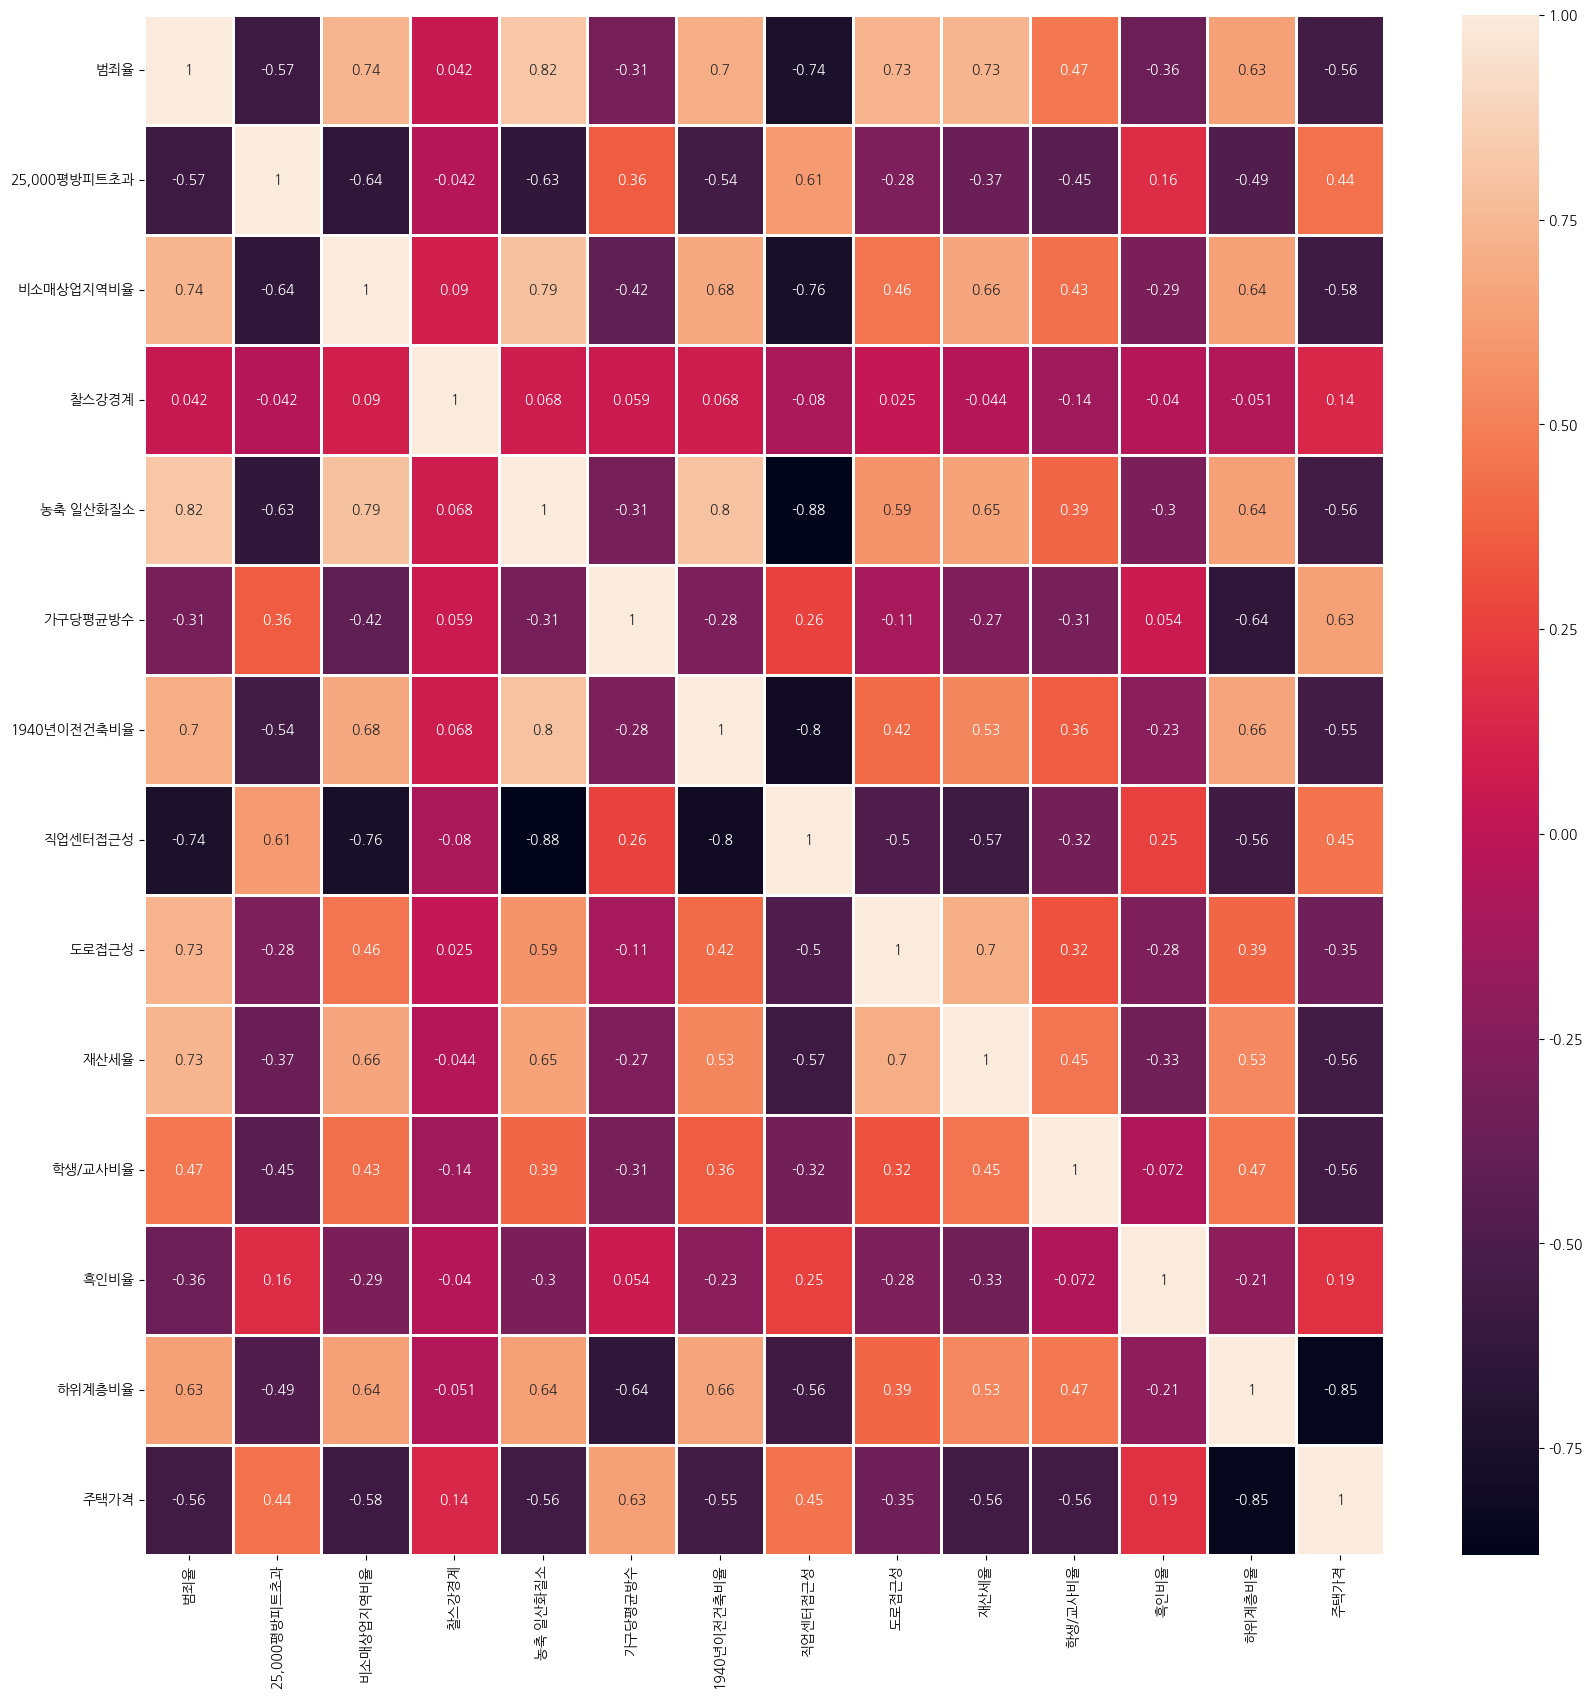

In [361]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(method='spearman'), annot=True, linewidths=1)

상관관계가 높은 것들 제거

In [203]:
data2 = data.drop(['1940년이전건축비율','25,000평방피트초과', '비소매상업지역비율','재산세율'], axis=1)

<Axes: >

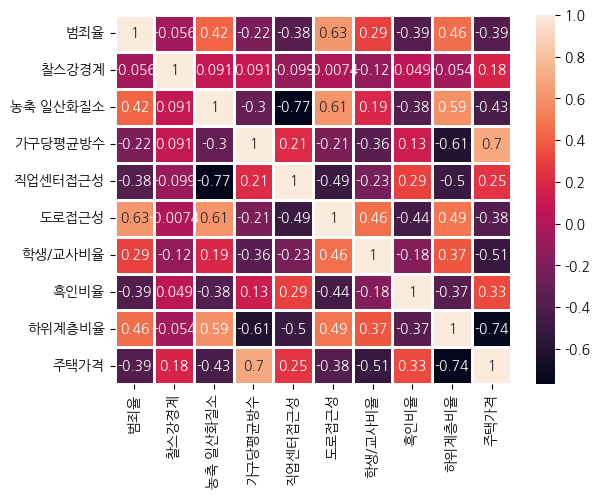

In [184]:
sns.heatmap(data2.corr(), annot=True, linewidths=1)

In [185]:
from ydata_profiling import ProfileReport

In [186]:
profile = ProfileReport(data, title="Profiling Report")

Summarize dataset:  32%|▎| 6/19 [00:00<00:00, 36.55it/s, Describe variable: 도로40
100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 177.63it/s]
Summarize dataset:   9%| | 17/190 [00:00<00:05, 32.70it/s, scatter 범죄율, 범죄 /Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) Arial.
  plt.savefig(
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) Arial.
  plt.savefig(
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  plt.savefig(
Summarize dataset:   9%| | 18/190 [00:00<00:05, 32.70it/s, scatter 25,000평방피/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/ydata_p

KeyboardInterrupt: 

/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51217 (\N{HANGUL SYLLABLE JEOB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  func(

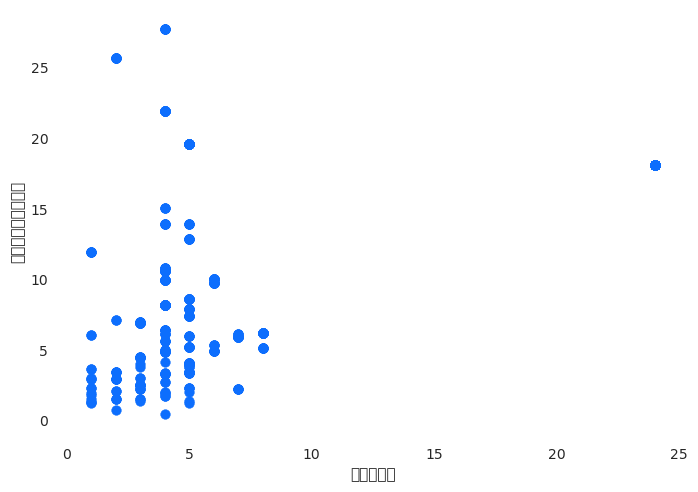

In [187]:
profile.to_file("보스턴집값.html")

In [299]:
X = data.drop('주택가격', axis=1)
y =  data['주택가격']

In [204]:
X = data2.drop('주택가격', axis=1)
y =  data2['주택가격']

In [263]:
from sklearn.model_selection import train_test_split 

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) 

선생님은 X데이터를 카피해서 2개 만듦

In [402]:
X_train2 = X_train.copy()

In [403]:
 X_test2 =  X_test.copy()

스케일링

In [404]:
from sklearn.preprocessing import RobustScaler

In [405]:
rs = RobustScaler()
rs.fit(X_train)
rs_X_train = rs.transform(X_train)
rs_X_test = rs.transform(X_test)

In [406]:
X.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율'],
      dtype='object')

In [407]:
rs_X_train

array([[ 4.72910196e+00,  0.00000000e+00,  7.35543562e-01, ...,
         4.41176471e-01, -2.06212252e+00,  1.45677083e+00],
       [ 1.17250382e-01,  0.00000000e+00, -3.23824210e-02, ...,
         6.76470588e-01,  2.12744977e-01, -2.55729167e-01],
       [-7.26343694e-02,  1.75000000e+00, -1.92752506e-01, ...,
        -5.29411765e-01, -1.43251572e+00, -3.22395833e-01],
       ...,
       [-7.89293695e-02,  4.00000000e+00, -5.05011565e-01, ...,
        -5.00000000e-01, -1.79958092e-02, -5.14062500e-01],
       [ 3.49156582e+00,  0.00000000e+00,  7.35543562e-01, ...,
         4.41176471e-01, -1.38767410e+01,  1.28593750e+00],
       [-1.04532240e-02,  0.00000000e+00,  0.00000000e+00, ...,
         6.47058824e-01, -1.58020461e+01, -3.07291667e-02]])

In [408]:
rs_X_train = pd.DataFrame(rs_X_train, columns=X.columns, index=X_train.index )
rs_X_train 

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
477,4.729102,0.00,0.735544,0.0,0.424581,-1.214070,0.407484,-0.324502,2.375,0.868217,0.441176,-2.062123,1.456771
15,0.117250,0.00,-0.032382,0.0,0.000000,-0.503853,-0.440748,0.399300,-0.125,-0.059432,0.676471,0.212745,-0.255729
332,-0.072634,1.75,-0.192753,0.0,-0.559218,-0.239866,-1.130977,1.045888,-0.500,-0.067183,-0.529412,-1.432516,-0.322396
423,2.174908,0.00,0.735544,0.0,0.424581,-0.143384,0.153846,-0.348318,2.375,0.868217,0.441176,-19.168495,1.288021
19,0.148777,0.00,-0.032382,0.0,0.000000,-0.647236,-0.170478,0.187372,-0.125,-0.059432,0.676471,-0.017503,0.036979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.028893,0.00,0.000000,0.0,-0.100559,-0.501173,0.295218,-0.291208,0.000,0.139535,0.647059,0.215210,0.805729
270,0.012100,1.00,-0.123362,0.0,-0.413408,-0.474372,-0.740125,0.378291,-0.250,-0.276486,-0.029412,-0.130901,0.216146
348,-0.078929,4.00,-0.505012,0.0,-0.575419,0.569514,-0.997921,1.560026,-0.125,-0.129199,-0.500000,-0.017996,-0.514062
435,3.491566,0.00,0.735544,0.0,1.128492,0.561474,0.351351,-0.317257,2.375,0.868217,0.441176,-13.876741,1.285937


In [409]:
rs_X_test = pd.DataFrame(rs_X_test, columns=X.columns, index=X_test.index)
rs_X_test

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
173,-0.054336,0.0,-0.347726,0.0,-0.156425,0.276047,0.133056,-0.159813,0.000,-0.087855,-0.617647,0.206829,-0.196354
274,-0.065657,2.0,-0.165767,1.0,-0.508380,0.734338,-0.931393,0.272222,-0.125,-0.196382,-0.323529,0.275854,-0.770313
491,-0.049863,0.0,1.478797,0.0,0.396648,-0.304188,0.438669,-0.394712,-0.125,0.984496,0.411765,-0.058918,0.744271
72,-0.054380,0.0,0.173477,0.0,-0.698324,-0.194305,-1.453222,0.637367,-0.125,-0.064599,0.147059,-0.019475,-0.563021
452,1.546930,0.0,0.735544,0.0,0.977654,0.116583,0.293139,-0.243757,2.375,0.868217,0.441176,-0.306422,0.660937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,5.942483,0.0,0.735544,0.0,0.329609,-2.119933,0.463617,-0.489552,2.375,0.868217,0.441176,-17.873290,2.442187
436,4.536055,0.0,0.735544,0.0,1.128492,0.336348,0.324324,-0.354113,2.375,0.868217,0.441176,-17.937384,0.742187
411,4.417491,0.0,0.735544,0.0,0.329609,0.598995,0.463617,-0.497521,2.375,0.868217,0.441176,-17.564649,1.072396
86,-0.067118,0.0,-0.313801,0.0,-0.497207,-0.261307,-0.677755,0.377748,-0.250,-0.214470,-0.058824,0.230987,0.201562


# 선형 다중 회귀 분석

In [410]:
import statsmodels.api as sm

선생님은 하나 더 불렀음

In [411]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [412]:
rs_X_train_const = sm.add_constant(rs_X_train)
rs_X_test_const = sm.add_constant(rs_X_test)

In [413]:
X_test_const.head()

,const,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
173,1.0,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,1.0,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,1.0,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,1.0,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,1.0,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27


In [414]:
X_train_const.head()

,const,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
477,1.0,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,1.0,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,1.0,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,1.0,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,1.0,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28


In [415]:
ols = sm.OLS(y_train,rs_X_train_const).fit()
pred = ols.predict(rs_X_test_const)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))
print(ols.summary())

MAE:  3.1890919658878483
MSE:  24.291119474973545
RMSE:  4.9286021826653394
R2:  0.6687594935356316
                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Thu, 08 May 2025   Prob (F-statistic):          6.21e-109
Time:                        17:44:30   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [416]:
	
result = pd.DataFrame(dict(y_test=y_test, pred=pred))
result

,y_test,pred
173,23.6,28.996724
274,32.4,36.025565
491,13.6,14.816944
72,22.8,25.031979
452,16.1,18.769880
...,...,...
412,17.9,-0.164237
436,9.6,13.684867
411,17.2,16.183597
86,22.5,22.276220


In [417]:
result['잔차'] = result['y_test'] - result['pred']
result['잔차제곱'] = result['잔차'] ** 2
result['MSE'] = result['잔차제곱'].mean()
result['RMSE'] = result['MSE'].apply(np.sqrt)
result

,y_test,pred,잔차,잔차제곱,MSE,RMSE
173,23.6,28.996724,-5.396724,29.124626,24.291119,4.928602
274,32.4,36.025565,-3.625565,13.144724,24.291119,4.928602
491,13.6,14.816944,-1.216944,1.480953,24.291119,4.928602
72,22.8,25.031979,-2.231979,4.981731,24.291119,4.928602
452,16.1,18.769880,-2.669880,7.128259,24.291119,4.928602
...,...,...,...,...,...,...
412,17.9,-0.164237,18.064237,326.316658,24.291119,4.928602
436,9.6,13.684867,-4.084867,16.686137,24.291119,4.928602
411,17.2,16.183597,1.016403,1.033075,24.291119,4.928602
86,22.5,22.276220,0.223780,0.050077,24.291119,4.928602


In [148]:
X_test_const = X_test_const.drop('비소매상업지역비율', axis=1)
X_test_const

,const,범죄율,"25,000평방피트초과",찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
173,1.0,-0.054336,0.0,0.0,-0.156425,0.276047,0.133056,-0.159813,0.000,-0.087855,-0.617647,0.206829,-0.196354
274,1.0,-0.065657,2.0,1.0,-0.508380,0.734338,-0.931393,0.272222,-0.125,-0.196382,-0.323529,0.275854,-0.770313
491,1.0,-0.049863,0.0,0.0,0.396648,-0.304188,0.438669,-0.394712,-0.125,0.984496,0.411765,-0.058918,0.744271
72,1.0,-0.054380,0.0,0.0,-0.698324,-0.194305,-1.453222,0.637367,-0.125,-0.064599,0.147059,-0.019475,-0.563021
452,1.0,1.546930,0.0,0.0,0.977654,0.116583,0.293139,-0.243757,2.375,0.868217,0.441176,-0.306422,0.660937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1.0,5.942483,0.0,0.0,0.329609,-2.119933,0.463617,-0.489552,2.375,0.868217,0.441176,-17.873290,2.442187
436,1.0,4.536055,0.0,0.0,1.128492,0.336348,0.324324,-0.354113,2.375,0.868217,0.441176,-17.937384,0.742187
411,1.0,4.417491,0.0,0.0,0.329609,0.598995,0.463617,-0.497521,2.375,0.868217,0.441176,-17.564649,1.072396
86,1.0,-0.067118,0.0,0.0,-0.497207,-0.261307,-0.677755,0.377748,-0.250,-0.214470,-0.058824,0.230987,0.201562


In [115]:
X_test_const = X_test_const.drop('도로접근성', axis=1)
X_test_const

,const,농축 일산화질소,가구당평균방수,직업센터접근성,학생/교사비율,흑인비율,하위계층비율
173,1.0,-0.156425,0.276047,-0.159813,-0.617647,0.206829,-0.196354
274,1.0,-0.508380,0.734338,0.272222,-0.323529,0.275854,-0.770313
491,1.0,0.396648,-0.304188,-0.394712,0.411765,-0.058918,0.744271
72,1.0,-0.698324,-0.194305,0.637367,0.147059,-0.019475,-0.563021
452,1.0,0.977654,0.116583,-0.243757,0.441176,-0.306422,0.660937
...,...,...,...,...,...,...,...
412,1.0,0.329609,-2.119933,-0.489552,0.441176,-17.873290,2.442187
436,1.0,1.128492,0.336348,-0.354113,0.441176,-17.937384,0.742187
411,1.0,0.329609,0.598995,-0.497521,0.441176,-17.564649,1.072396
86,1.0,-0.497207,-0.261307,0.377748,-0.058824,0.230987,0.201562


In [149]:
X_train_const = X_train_const.drop('비소매상업지역비율', axis=1)
X_train_const

,const,범죄율,"25,000평방피트초과",찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
477,1.0,4.729102,0.00,0.0,0.424581,-1.214070,0.407484,-0.324502,2.375,0.868217,0.441176,-2.062123,1.456771
15,1.0,0.117250,0.00,0.0,0.000000,-0.503853,-0.440748,0.399300,-0.125,-0.059432,0.676471,0.212745,-0.255729
332,1.0,-0.072634,1.75,0.0,-0.559218,-0.239866,-1.130977,1.045888,-0.500,-0.067183,-0.529412,-1.432516,-0.322396
423,1.0,2.174908,0.00,0.0,0.424581,-0.143384,0.153846,-0.348318,2.375,0.868217,0.441176,-19.168495,1.288021
19,1.0,0.148777,0.00,0.0,0.000000,-0.647236,-0.170478,0.187372,-0.125,-0.059432,0.676471,-0.017503,0.036979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,-0.028893,0.00,0.0,-0.100559,-0.501173,0.295218,-0.291208,0.000,0.139535,0.647059,0.215210,0.805729
270,1.0,0.012100,1.00,0.0,-0.413408,-0.474372,-0.740125,0.378291,-0.250,-0.276486,-0.029412,-0.130901,0.216146
348,1.0,-0.078929,4.00,0.0,-0.575419,0.569514,-0.997921,1.560026,-0.125,-0.129199,-0.500000,-0.017996,-0.514062
435,1.0,3.491566,0.00,0.0,1.128492,0.561474,0.351351,-0.317257,2.375,0.868217,0.441176,-13.876741,1.285937


In [116]:
X_train_const = X_train_const.drop('도로접근성', axis=1)
X_train_const

,const,농축 일산화질소,가구당평균방수,직업센터접근성,학생/교사비율,흑인비율,하위계층비율
477,1.0,0.424581,-1.214070,-0.324502,0.441176,-2.062123,1.456771
15,1.0,0.000000,-0.503853,0.399300,0.676471,0.212745,-0.255729
332,1.0,-0.559218,-0.239866,1.045888,-0.529412,-1.432516,-0.322396
423,1.0,0.424581,-0.143384,-0.348318,0.441176,-19.168495,1.288021
19,1.0,0.000000,-0.647236,0.187372,0.676471,-0.017503,0.036979
...,...,...,...,...,...,...,...
106,1.0,-0.100559,-0.501173,-0.291208,0.647059,0.215210,0.805729
270,1.0,-0.413408,-0.474372,0.378291,-0.029412,-0.130901,0.216146
348,1.0,-0.575419,0.569514,1.560026,-0.500000,-0.017996,-0.514062
435,1.0,1.128492,0.561474,-0.317257,0.441176,-13.876741,1.285937


In [150]:
lr = sm.OLS(y_train,X_train_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     98.09
Date:                Thu, 08 May 2025   Prob (F-statistic):          7.32e-110
Time:                        13:36:35   Log-Likelihood:                -1194.5
No. Observations:                 404   AIC:                             2415.
Df Residuals:                     391   BIC:                             2467.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.8294      0.365     65.316   

In [151]:
X_test_const = X_test_const.drop('1940년이전건축비율', axis=1)

In [152]:
X_train_const = X_train_const.drop('1940년이전건축비율', axis=1)
X_train_const

,const,범죄율,"25,000평방피트초과",찰스강경계,농축 일산화질소,가구당평균방수,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
477,1.0,4.729102,0.00,0.0,0.424581,-1.214070,-0.324502,2.375,0.868217,0.441176,-2.062123,1.456771
15,1.0,0.117250,0.00,0.0,0.000000,-0.503853,0.399300,-0.125,-0.059432,0.676471,0.212745,-0.255729
332,1.0,-0.072634,1.75,0.0,-0.559218,-0.239866,1.045888,-0.500,-0.067183,-0.529412,-1.432516,-0.322396
423,1.0,2.174908,0.00,0.0,0.424581,-0.143384,-0.348318,2.375,0.868217,0.441176,-19.168495,1.288021
19,1.0,0.148777,0.00,0.0,0.000000,-0.647236,0.187372,-0.125,-0.059432,0.676471,-0.017503,0.036979
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,-0.028893,0.00,0.0,-0.100559,-0.501173,-0.291208,0.000,0.139535,0.647059,0.215210,0.805729
270,1.0,0.012100,1.00,0.0,-0.413408,-0.474372,0.378291,-0.250,-0.276486,-0.029412,-0.130901,0.216146
348,1.0,-0.078929,4.00,0.0,-0.575419,0.569514,1.560026,-0.125,-0.129199,-0.500000,-0.017996,-0.514062
435,1.0,3.491566,0.00,0.0,1.128492,0.561474,-0.317257,2.375,0.868217,0.441176,-13.876741,1.285937


In [153]:
lr = sm.OLS(y_train,X_train_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     107.2
Date:                Thu, 08 May 2025   Prob (F-statistic):          7.52e-111
Time:                        13:36:43   Log-Likelihood:                -1194.6
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     392   BIC:                             2461.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.8700      0.351     67.983   

In [154]:
X_test_const = X_test_const.drop('25,000평방피트초과', axis=1)

In [155]:
X_train_const = X_train_const.drop('25,000평방피트초과', axis=1)

In [156]:
lr = sm.OLS(y_train,X_train_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     116.8
Date:                Thu, 08 May 2025   Prob (F-statistic):          3.85e-111
Time:                        13:36:48   Log-Likelihood:                -1196.4
No. Observations:                 404   AIC:                             2415.
Df Residuals:                     393   BIC:                             2459.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9590      0.349     68.649      0.0

스케일러를 바꿔볼까?

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) 

In [120]:
ss = StandardScaler()
ss.fit(X_train)
ss_X_train = rs.transform(X_train)
ss_X_test = rs.transform(X_test)

In [121]:
X_train = pd.DataFrame(rs_X_train, columns=X.columns, index=X_train.index )
X_train 

,농축 일산화질소,가구당평균방수,직업센터접근성,도로접근성,학생/교사비율,흑인비율,하위계층비율
477,0.424581,-1.214070,-0.324502,2.375,0.441176,-2.062123,1.456771
15,0.000000,-0.503853,0.399300,-0.125,0.676471,0.212745,-0.255729
332,-0.559218,-0.239866,1.045888,-0.500,-0.529412,-1.432516,-0.322396
423,0.424581,-0.143384,-0.348318,2.375,0.441176,-19.168495,1.288021
19,0.000000,-0.647236,0.187372,-0.125,0.676471,-0.017503,0.036979
...,...,...,...,...,...,...,...
106,-0.100559,-0.501173,-0.291208,0.000,0.647059,0.215210,0.805729
270,-0.413408,-0.474372,0.378291,-0.250,-0.029412,-0.130901,0.216146
348,-0.575419,0.569514,1.560026,-0.125,-0.500000,-0.017996,-0.514062
435,1.128492,0.561474,-0.317257,2.375,0.441176,-13.876741,1.285937


In [122]:
X_test = pd.DataFrame(rs_X_test, columns=X.columns, index=X_test.index)
X_test

,농축 일산화질소,가구당평균방수,직업센터접근성,도로접근성,학생/교사비율,흑인비율,하위계층비율
173,-0.156425,0.276047,-0.159813,0.000,-0.617647,0.206829,-0.196354
274,-0.508380,0.734338,0.272222,-0.125,-0.323529,0.275854,-0.770313
491,0.396648,-0.304188,-0.394712,-0.125,0.411765,-0.058918,0.744271
72,-0.698324,-0.194305,0.637367,-0.125,0.147059,-0.019475,-0.563021
452,0.977654,0.116583,-0.243757,2.375,0.441176,-0.306422,0.660937
...,...,...,...,...,...,...,...
412,0.329609,-2.119933,-0.489552,2.375,0.441176,-17.873290,2.442187
436,1.128492,0.336348,-0.354113,2.375,0.441176,-17.937384,0.742187
411,0.329609,0.598995,-0.497521,2.375,0.441176,-17.564649,1.072396
86,-0.497207,-0.261307,0.377748,-0.250,-0.058824,0.230987,0.201562


In [123]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [124]:
lr = sm.OLS(y_train,X_train_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     154.6
Date:                Thu, 08 May 2025   Prob (F-statistic):          4.39e-109
Time:                        13:18:56   Log-Likelihood:                -1209.0
No. Observations:                 404   AIC:                             2434.
Df Residuals:                     396   BIC:                             2466.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0650      0.349     68.862      0.0

In [125]:
X_train_const = X_train_const.drop('도로접근성', axis=1)

In [126]:
X_test_const = X_test_const.drop('도로접근성', axis=1)

In [127]:
lr = sm.OLS(y_train,X_train_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     179.5
Date:                Thu, 08 May 2025   Prob (F-statistic):          8.78e-110
Time:                        13:19:41   Log-Likelihood:                -1210.1
No. Observations:                 404   AIC:                             2434.
Df Residuals:                     397   BIC:                             2462.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2540      0.324     74.781      0.0

# 	최적회귀 구하기(단계적 변수 선택법)

* 전진 선택법
* 후진 제거법

In [425]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [426]:
model = LinearRegression()

전진 선택법 분석

In [427]:
sfs_fw = SequentialFeatureSelector(
    estimator=model,
    direction='forward',
    scoring='r2',
    cv=5,
    n_jobs=4
)
sfs_fw.fit(X_train_const, y_train)
print(sfs_fw.get_support())
selected_cols = X_train_const.columns[sfs_fw.get_support()]
print("전진선택법으로 선택된 컬럼: ", list(selected_cols))

[False False False False  True  True  True False  True False False  True
  True  True]
전진선택법으로 선택된 컬럼:  ['찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '흑인비율', '하위계층비율']


In [428]:
print("원래 컬럼수: ", len(X_train_const.columns))
print("selected_cols: ", len(selected_cols))

원래 컬럼수:  14
selected_cols:  7


In [429]:
fw_X_train = X_train_const[['const','찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '흑인비율', '하위계층비율']]

In [430]:
fw_X_test = X_test_const[['const','찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '흑인비율', '하위계층비율']]

In [432]:
ols2 = sm.OLS(y_train,fw_X_train).fit()
pred =  ols2.predict(fw_X_test)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))
print(ols2.summary())

MAE:  3.3833169114044312
MSE:  26.96575938921539
RMSE:  5.192856573141164
R2:  0.6322873547889571
                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     159.4
Date:                Thu, 08 May 2025   Prob (F-statistic):          5.24e-111
Time:                        17:49:36   Log-Likelihood:                -1204.5
No. Observations:                 404   AIC:                             2425.
Df Residuals:                     396   BIC:                             2457.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

# 후진제거법

In [433]:
sfs_bw = SequentialFeatureSelector(
    estimator=model,
    direction='backward',
    scoring='r2',
    cv=5,
    n_jobs=4
)
sfs_bw.fit(X_train_const, y_train)
print(sfs_bw.get_support())
selected_cols = X_train_const.columns[sfs_bw.get_support()]
print("후진선택법으로 선택된 컬럼: ", list(selected_cols))

[False False False False  True  True  True False  True False False  True
  True  True]
후진선택법으로 선택된 컬럼:  ['찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '흑인비율', '하위계층비율']


In [434]:
bw_X_train = rs_X_train_const[['const', '범죄율', '농축 일산화질소', '가구당평균방수', '도로접근성', '직업센터접근성', '학생/교사비율', '하위계층비율']]
bw_X_test = rs_X_test_const[['const', '범죄율', '농축 일산화질소', '가구당평균방수', '도로접근성', '직업센터접근성', '학생/교사비율', '하위계층비율']]

In [435]:
ols3 = sm.OLS(y_train, bw_X_train).fit()
pred = ols3.predict(bw_X_test)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

MAE:  3.328243655737482
MSE:  25.2840072542828
RMSE:  5.028320520241604
R2:  0.6552201977769689


In [295]:
print("원래 컬럼수: ", len(X_train_const.columns))
print("selected_cols: ", len(selected_cols))

원래 컬럼수:  14
selected_cols:  7


In [296]:
fw_X_train.columns

Index(['const', '찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '흑인비율',
       '하위계층비율'],
      dtype='object')

In [436]:
print(ols3.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     150.0
Date:                Thu, 08 May 2025   Prob (F-statistic):          3.12e-107
Time:                        17:57:45   Log-Likelihood:                -1213.4
No. Observations:                 404   AIC:                             2443.
Df Residuals:                     396   BIC:                             2475.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0011      0.353     68.071      0.0

# 정규화를 통한 선형회귀 변수 선택법
## 1) Lasso 회귀(L1규제)
* 가중치의 절대값의 합을 최소화
* 일부 가중치를 0으로 만들어서 변수를 무력화
* 변수를 선택하는 효과
* 불필요한 변수 제거

## 2)Ridge 회귀(L2규제)
* 알파벳순으로 기억
* 가중치의 제곱합을 최소화
* 계수를 0에 가깝게 만들지만 제거는 하지 않음
* 다중공선선 해결에 효과적인 규제

## 3) Elastic Net(혼합규제, L1,+L2)
* L1규제와 L2규제를 결합한 모델
* Lasso와 Ridge의 장점을 모두 활용
* 변수 간 상관관계가 높을 때 효과적

# 정규화 회귀를 사용하는 이유: 과적합방지, 범용성 향상 

# 라쏘(Lasso, L1 제약, 절대값, 변수제외)

In [314]:
from sklearn.linear_model import Lasso

In [315]:
X_train

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [437]:
lasso = Lasso(alpha=1.0)
lasso.fit(rs_X_train, y_train)
pred = lasso.predict(rs_X_test)
lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
display(lasso_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.316514
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.899789
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  3.86292163532475
MSE:  32.38719208408526
RMSE:  5.69097461636276
R2:  0.5583591806073868


alpha값을 변경하면서 비교

In [438]:
for i in range(1, 10):
    lasso = Lasso(alpha=i)
    lasso.fit(rs_X_train, y_train)
    pred = lasso.predict(rs_X_test)
    lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
    print("=" * 20, f"alpha={i}", "=" * 20)
    display(lasso_result)
    print("MAE: ", mean_absolute_error(y_test, pred))
    print("MSE: ", mean_squared_error(y_test, pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
    print("R2: ", r2_score(y_test, pred))

==================== alpha=1 ====================


,0
범죄율,-0.316514
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.899789
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  3.86292163532475
MSE:  32.38719208408526
RMSE:  5.69097461636276
R2:  0.5583591806073868
==================== alpha=2 ====================


,0
범죄율,-0.409235
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.677085
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  4.238540718294842
MSE:  38.07224985922285
RMSE:  6.170271457498677
R2:  0.48083614101854033
==================== alpha=3 ====================


,0
범죄율,-0.448308
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.176363
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  4.6250987695688925
MSE:  44.67489779191717
RMSE:  6.683928320375464
R2:  0.39080058512393234
==================== alpha=4 ====================


,0
범죄율,-0.404001
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,2.101030
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  4.925415654784625
MSE:  49.643003919221826
RMSE:  7.045779156290795
R2:  0.3230540989452043
==================== alpha=5 ====================


,0
범죄율,-0.359693
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,1.025697
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  5.3540271123625685
MSE:  56.739342020228634
RMSE:  7.53255215848046
R2:  0.22628644568650447
==================== alpha=6 ====================


,0
범죄율,-0.312344
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  5.819581821367014
MSE:  65.55184553171452
RMSE:  8.096409422189229
R2:  0.10611668037902122
==================== alpha=7 ====================


,0
범죄율,-0.202172
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  5.86489512986616
MSE:  66.97959450817982
RMSE:  8.184106213153628
R2:  0.08664749557855966
==================== alpha=8 ====================


,0
범죄율,-0.092000
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  5.9291086672438436
MSE:  68.62795462080751
RMSE:  8.2841990935037
R2:  0.06416999555617531
==================== alpha=9 ====================


,0
범죄율,-0.000000
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  6.002283203322612
MSE:  70.27916096924234
RMSE:  8.383266724209742
R2:  0.041653683465403324


# 릿지(Ridge, L2제약, 제곱합, 변수를 0에 가깝게 만들어 무력화)

In [321]:
from sklearn.linear_model import Ridge

In [439]:
ridge = Ridge(alpha=1.0)
ridge.fit(rs_X_train, y_train)
pred = ridge.predict(rs_X_test)
ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
display(ridge_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.350459
"25,000평방피트초과",0.562186
비소매상업지역비율,0.399324
찰스강경계,2.720437
농축 일산화질소,-2.974157
가구당평균방수,3.340857
1940년이전건축비율,-0.299001
직업센터접근성,-4.661667
도로접근성,1.927590
재산세율,-3.636555


MAE:  3.1868424980478425
MSE:  24.39367704371861
RMSE:  4.938995550080867
R2:  0.6673609898129905


In [440]:
	
ridge = Ridge(alpha=100)
ridge.fit(rs_X_train, y_train)
pred = ridge.predict(rs_X_test)
ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
display(ridge_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.357750
"25,000평방피트초과",0.230914
비소매상업지역비율,-0.386091
찰스강경계,0.818968
농축 일산화질소,-0.696373
가구당평균방수,3.513013
1940년이전건축비율,-0.223168
직업센터접근성,-1.359157
도로접근성,0.181791
재산세율,-0.452589


MAE:  3.4269853006798154
MSE:  28.027806523411254
RMSE:  5.2941294396162295
R2:  0.6178049827030385


규제가 강해질수록 설명력은 떨어지고 lasso의 규제가 더 강하다

# Elastic Net( Lasso와 Ridge를 동시에 사용, L1+L2)

In [441]:
from sklearn.linear_model import ElasticNet

In [442]:
el_net = ElasticNet(alpha=1, l1_ratio=0.5)
el_net.fit(rs_X_train, y_train)
pred = el_net.predict(rs_X_test)
el_net_result = pd.DataFrame(el_net.coef_, index=el_net.feature_names_in_)
display(el_net_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.443008
"25,000평방피트초과",0.138998
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.033190
가구당평균방수,2.972247
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  3.92919276110503
MSE:  33.298116017245114
RMSE:  5.770451976859794
R2:  0.5459375668039861


In [443]:
el_net = ElasticNet(alpha=1, l1_ratio=0.3)
el_net.fit(rs_X_train, y_train)
pred = el_net.predict(rs_X_test)
el_net_result = pd.DataFrame(el_net.coef_, index=el_net.feature_names_in_)
display(el_net_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.447503
"25,000평방피트초과",0.226532
비소매상업지역비율,-0.172613
찰스강경계,0.021456
농축 일산화질소,-0.206543
가구당평균방수,2.716833
1940년이전건축비율,-0.000000
직업센터접근성,-0.012776
도로접근성,-0.059715
재산세율,-0.040782


MAE:  3.9421995603605184
MSE:  33.352738330611444
RMSE:  5.775182969448799
R2:  0.5451927216451469


# LassoCV, RidgeCV, ElasticnetCV

In [444]:
from sklearn.linear_model import LassoCV,RidgeCV, ElasticNetCV

In [445]:
alphas= np.logspace(-4, 4, 100)
alphas

array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-03, 5.99484250e-03, 7.22080902e-03,
       8.69749003e-03, 1.04761575e-02, 1.26185688e-02, 1.51991108e-02,
       1.83073828e-02, 2.20513074e-02, 2.65608778e-02, 3.19926714e-02,
       3.85352859e-02, 4.64158883e-02, 5.59081018e-02, 6.73415066e-02,
       8.11130831e-02, 9.77009957e-02, 1.17681195e-01, 1.41747416e-01,
       1.70735265e-01, 2.05651231e-01, 2.47707636e-01, 2.98364724e-01,
       3.59381366e-01, 4.32876128e-01, 5.21400829e-01, 6.28029144e-01,
       7.56463328e-01, 9.11162756e-01, 1.09749877e+00, 1.32194115e+00,
       1.59228279e+00, 1.91791026e+00, 2.31012970e+00, 2.78255940e+00,
      

In [336]:
lassoCV = LassoCV(alphas=alphas, cv=5,
    n_jobs=4,
    random_state=42,
    selection='cyclic',)
lassoCV.fit(X_train,y_train)
print(lassoCV.alpha_)

0.0001


In [446]:
lasso = Lasso(alpha=0.0001)
lasso.fit(rs_X_train, y_train)
pred = lasso.predict(rs_X_test)
lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
display(lasso_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.352850
"25,000평방피트초과",0.601645
비소매상업지역비율,0.520858
찰스강경계,2.783461
농축 일산화질소,-3.077796
가구당평균방수,3.312629
1940년이전건축비율,-0.302081
직업센터접근성,-4.795143
도로접근성,2.096985
재산세율,-4.113280


MAE:  3.1889756077853146
MSE:  24.29185196937948
RMSE:  4.928676492668136
R2:  0.6687495050368202


In [448]:
ridgeCV = RidgeCV(alphas=alphas, cv=5)
ridgeCV.fit(rs_X_train, y_train)
print(ridgeCV.alpha_)

0.298364724028334


In [449]:
ridge = Ridge(alpha=0.298364724028334)
ridge.fit(rs_X_train, y_train)
pred = ridge.predict(rs_X_test)
ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
display(ridge_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.352132
"25,000평방피트초과",0.589412
비소매상업지역비율,0.483130
찰스강경계,2.765679
농축 일산화질소,-3.047364
가구당평균방수,3.321305
1940년이전건축비율,-0.301659
직업센터접근성,-4.755390
도로접근성,2.043952
재산세율,-3.962507


MAE:  3.187955747444363
MSE:  24.32187920919131
RMSE:  4.931721728685765
R2:  0.6683400451873783


In [450]:
rations = np.linspace(0.1,1,10)
rations

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [451]:
el_net = ElasticNet(alpha=1, l1_ratio=0.3)
print(ridgeCV.alpha_)

0.298364724028334


In [453]:
el_netCV = ElasticNetCV(alphas=alphas, l1_ratio=rations,  cv=5, n_jobs=4, random_state=42)
el_netCV.fit(rs_X_train, y_train)
print(el_netCV.alpha_, el_netCV.l1_ratio_)

0.0001747528400007683 0.1


In [454]:
	
el_net = ElasticNet(alpha=0.0001747528400007683, l1_ratio=0.1)
el_net.fit(rs_X_train, y_train)
pred = el_net.predict(rs_X_test)
el_net_result = pd.DataFrame(el_net.coef_, index=el_net.feature_names_in_)
display(el_net_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.352728
"25,000평방피트초과",0.599318
비소매상업지역비율,0.514309
찰스강경계,2.780305
농축 일산화질소,-3.072181
가구당평균방수,3.314413
1940년이전건축비율,-0.302462
직업센터접근성,-4.787538
도로접근성,2.086858
재산세율,-4.084400


MAE:  3.1888148912549616
MSE:  24.29780231715811
RMSE:  4.92928010130872
R2:  0.6686683644284648


# Tree계열 회귀 사용하기
* decisiontree,Randomforest, xgboost, lightgbm은 모두 회귀 분석도 가능

In [455]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [456]:
dtr = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(rs_X_train, y_train)
pred = dtr.predict(rs_X_test)
dtr_result = pd.DataFrame(dtr.feature_importances_, index=dtr.feature_names_in_)
display(dtr_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,0.030528
"25,000평방피트초과",0.000000
비소매상업지역비율,0.000000
찰스강경계,0.000000
농축 일산화질소,0.000000
가구당평균방수,0.659397
1940년이전건축비율,0.000000
직업센터접근성,0.063661
도로접근성,0.018773
재산세율,0.000000


MAE:  3.1777352113222603
MSE:  16.766567150642494
RMSE:  4.094699885295929
R2:  0.7713663958398644


In [457]:
for i in range(1, 10):
    dtr = DecisionTreeRegressor(max_depth=i, random_state=42)
    dtr.fit(rs_X_train, y_train)
    pred = dtr.predict(rs_X_test)
    dtr_result = pd.DataFrame(dtr.feature_importances_, index=dtr.feature_names_in_)
#     display(dtr_result)
    print(i)
    print("MAE: ", mean_absolute_error(y_test, pred))
    print("MSE: ", mean_squared_error(y_test, pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
    print("R2: ", r2_score(y_test, pred))
    print()

1
MAE:  4.892007409279314
MSE:  46.91780325106487
RMSE:  6.8496571630312175
R2:  0.3602156982888397

2
MAE:  3.6797926100884863
MSE:  25.993190895971196
RMSE:  5.098351782289174
R2:  0.6455495710736121

3
MAE:  3.1777352113222603
MSE:  16.766567150642494
RMSE:  4.094699885295929
R2:  0.7713663958398644

4
MAE:  2.8860900436597023
MSE:  19.74975421245043
RMSE:  4.444069555311936
R2:  0.7306868217984426

5
MAE:  2.308156816332771
MSE:  8.553906584646844
RMSE:  2.924706239034417
R2:  0.8833565347917995

6
MAE:  2.3767136327277707
MSE:  8.928833378158663
RMSE:  2.9881153555642164
R2:  0.8782439280592088

7
MAE:  2.189398804393552
MSE:  9.003701415139483
RMSE:  3.0006168391081665
R2:  0.8772230065445347

8
MAE:  2.2761932910419067
MSE:  8.978508612023766
RMSE:  2.9964159611148395
R2:  0.8775665426615878

9
MAE:  2.229362161531279
MSE:  8.891302268049543
RMSE:  2.9818286785208743
R2:  0.8787557127850434



In [458]:
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr.fit(rs_X_train, y_train)
pred = dtr.predict(rs_X_test)
dtr_result = pd.DataFrame(dtr.feature_importances_, index=dtr.feature_names_in_)
display(dtr_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,0.068622
"25,000평방피트초과",0.000000
비소매상업지역비율,0.003801
찰스강경계,0.000000
농축 일산화질소,0.003561
가구당평균방수,0.651196
1940년이전건축비율,0.006176
직업센터접근성,0.067445
도로접근성,0.000000
재산세율,0.000000


MAE:  2.308156816332771
MSE:  8.553906584646844
RMSE:  2.924706239034417
R2:  0.8833565347917995


In [459]:
from sklearn.tree import plot_tree

[Text(0.55, 0.9166666666666666, '가구당평균방수 <= 0.98\nsquared_error = 86.873\nsamples = 404\nvalue = 22.797'),
 Text(0.2611111111111111, 0.75, '하위계층비율 <= 0.362\nsquared_error = 40.321\nsamples = 337\nvalue = 19.947'),
 Text(0.40555555555555556, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, '직업센터접근성 <= -0.541\nsquared_error = 25.693\nsamples = 203\nvalue = 23.325'),
 Text(0.044444444444444446, 0.4166666666666667, '범죄율 <= 3.155\nsquared_error = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(0.022222222222222223, 0.25, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.06666666666666667, 0.25, 'squared_error = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.15555555555555556, 0.4166666666666667, '가구당평균방수 <= 0.446\nsquared_error = 15.197\nsamples = 199\nvalue = 22.899'),
 Text(0.1111111111111111, 0.25, '가구당평균방수 <= -0.149\nsquared_error = 8.635\nsamples = 156\nvalue = 21.632'),
 Text(0.08888888888888889, 0.08333333333333333, 'squared_error = 6.595\nsamples = 72\nvalue = 20.356'

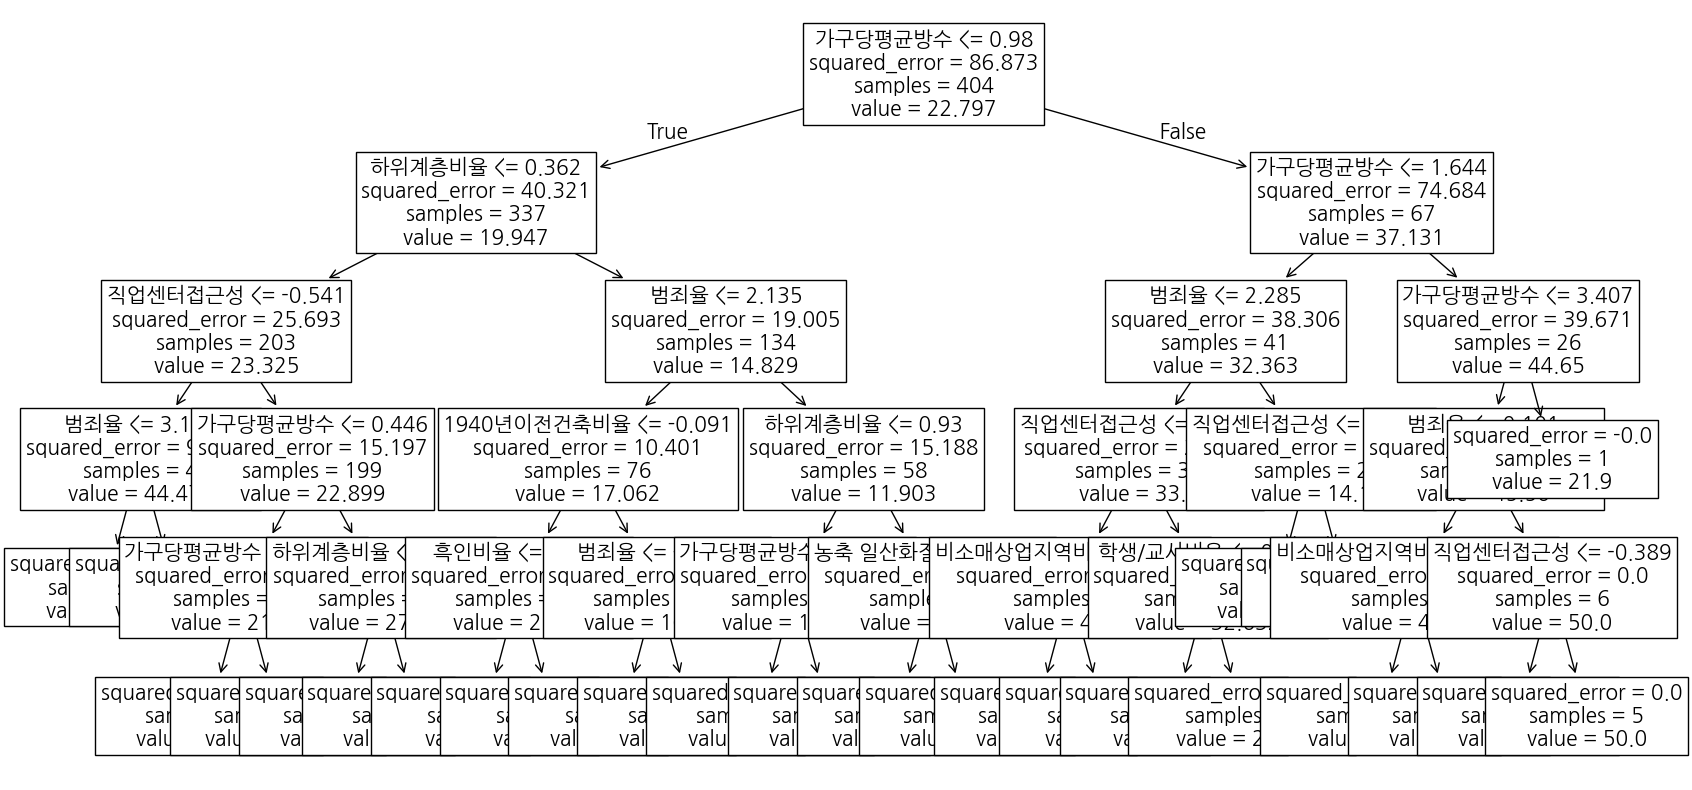

In [461]:
plt.figure(figsize=(20,10))
plot_tree(dtr, max_depth=5, feature_names=dtr.feature_names_in_, fontsize=15)

In [462]:
rfr = RandomForestRegressor(max_depth=3, n_estimators=100, n_jobs=4, random_state=42)
rfr.fit(rs_X_train, y_train)
pred = rfr.predict(rs_X_test)
rfr_result = pd.DataFrame(rfr.feature_importances_, index=rfr.feature_names_in_)
display(rfr_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,0.026096
"25,000평방피트초과",0.000443
비소매상업지역비율,0.001771
찰스강경계,0.000415
농축 일산화질소,0.008759
가구당평균방수,0.549972
1940년이전건축비율,0.001018
직업센터접근성,0.054155
도로접근성,0.001873
재산세율,0.003440


MAE:  2.6518893823216843
MSE:  12.692986037043793
RMSE:  3.562721717597909
R2:  0.826914888472421


In [463]:
for i in range(1, 11):
    rfr = RandomForestRegressor(max_depth=i, n_estimators=500, n_jobs=4, random_state=42)
    rfr.fit(rs_X_train, y_train)
    pred = rfr.predict(rs_X_test)
    rfr_result = pd.DataFrame(rfr.feature_importances_, index=rfr.feature_names_in_)
    print(i)
    display(rfr_result)
    print("MAE: ", mean_absolute_error(y_test, pred))
    print("MSE: ", mean_squared_error(y_test, pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
    print("R2: ", r2_score(y_test, pred))
    print()

1


,0
범죄율,0.000
"25,000평방피트초과",0.000
비소매상업지역비율,0.000
찰스강경계,0.000
농축 일산화질소,0.000
가구당평균방수,0.686
1940년이전건축비율,0.000
직업센터접근성,0.000
도로접근성,0.000
재산세율,0.000


MAE:  3.972103393336772
MSE:  36.22426462817592
RMSE:  6.018659703636344
R2:  0.5060357850489983

2


,0
범죄율,0.002717
"25,000평방피트초과",0.000170
비소매상업지역비율,0.000000
찰스강경계,0.000000
농축 일산화질소,0.001933
가구당평균방수,0.573188
1940년이전건축비율,0.001379
직업센터접근성,0.001795
도로접근성,0.000000
재산세율,0.000000


MAE:  3.1881910884540723
MSE:  21.25545146482092
RMSE:  4.610363485108405
R2:  0.710154712482894

3


,0
범죄율,0.025356
"25,000평방피트초과",0.000822
비소매상업지역비율,0.001047
찰스강경계,0.000355
농축 일산화질소,0.010048
가구당평균방수,0.522777
1940년이전건축비율,0.002564
직업센터접근성,0.047889
도로접근성,0.001952
재산세율,0.003169


MAE:  2.644263131846151
MSE:  13.246251171081573
RMSE:  3.6395399669575785
R2:  0.8193704101952234

4


,0
범죄율,0.031314
"25,000평방피트초과",0.000926
비소매상업지역비율,0.002650
찰스강경계,0.000837
농축 일산화질소,0.012120
가구당평균방수,0.511583
1940년이전건축비율,0.006741
직업센터접근성,0.052883
도로접근성,0.002692
재산세율,0.006982


MAE:  2.402863377434886
MSE:  10.857714597030107
RMSE:  3.2951046412868448
R2:  0.851941163688598

5


,0
범죄율,0.033624
"25,000평방피트초과",0.001073
비소매상업지역비율,0.003754
찰스강경계,0.000924
농축 일산화질소,0.013772
가구당평균방수,0.502359
1940년이전건축비율,0.008996
직업센터접근성,0.053413
도로접근성,0.002742
재산세율,0.011494


MAE:  2.241635969217888
MSE:  9.767157298708662
RMSE:  3.125245158176981
R2:  0.8668123083551327

6


,0
범죄율,0.034580
"25,000평방피트초과",0.001241
비소매상업지역비율,0.004701
찰스강경계,0.000891
농축 일산화질소,0.015626
가구당평균방수,0.494015
1940년이전건축비율,0.010941
직업센터접근성,0.055356
도로접근성,0.003335
재산세율,0.013423


MAE:  2.142120163024831
MSE:  9.045625791138383
RMSE:  3.007594685315557
R2:  0.8766513140149506

7


,0
범죄율,0.036010
"25,000평방피트초과",0.001492
비소매상업지역비율,0.005391
찰스강경계,0.000985
농축 일산화질소,0.015585
가구당평균방수,0.488855
1940년이전건축비율,0.012670
직업센터접근성,0.056231
도로접근성,0.003428
재산세율,0.014261


MAE:  2.101992660853728
MSE:  8.86905156117847
RMSE:  2.97809529081567
R2:  0.8790591296539431

8


,0
범죄율,0.036579
"25,000평방피트초과",0.001554
비소매상업지역비율,0.005698
찰스강경계,0.000917
농축 일산화질소,0.016130
가구당평균방수,0.485443
1940년이전건축비율,0.013553
직업센터접근성,0.056319
도로접근성,0.004114
재산세율,0.014922


MAE:  2.0867725123549703
MSE:  8.82393541540222
RMSE:  2.9705109687395903
R2:  0.8796743460498792

9


,0
범죄율,0.036559
"25,000평방피트초과",0.001648
비소매상업지역비율,0.006102
찰스강경계,0.001084
농축 일산화질소,0.016645
가구당평균방수,0.484111
1940년이전건축비율,0.014090
직업센터접근성,0.056563
도로접근성,0.004195
재산세율,0.015047


MAE:  2.084666407391042
MSE:  8.790621272959653
RMSE:  2.9648981893076285
R2:  0.8801286270238982

10


,0
범죄율,0.037163
"25,000평방피트초과",0.001721
비소매상업지역비율,0.006227
찰스강경계,0.001315
농축 일산화질소,0.016542
가구당평균방수,0.482527
1940년이전건축비율,0.014460
직업센터접근성,0.056487
도로접근성,0.004308
재산세율,0.015416


MAE:  2.0763839766179424
MSE:  8.708850031507298
RMSE:  2.9510760802641633
R2:  0.8812436825675837



In [465]:
rfr = RandomForestRegressor(max_depth=10, n_estimators=500, n_jobs=4, random_state=42)
rfr.fit(rs_X_train, y_train)
pred = rfr.predict(rs_X_test)
rfr_result = pd.DataFrame(rfr.feature_importances_, index=rfr.feature_names_in_)
display(rfr_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,0.037163
"25,000평방피트초과",0.001721
비소매상업지역비율,0.006227
찰스강경계,0.001315
농축 일산화질소,0.016542
가구당평균방수,0.482527
1940년이전건축비율,0.014460
직업센터접근성,0.056487
도로접근성,0.004308
재산세율,0.015416


MAE:  2.076383976617943
MSE:  8.708850031507302
RMSE:  2.951076080264164
R2:  0.8812436825675837


In [ ]:
lgbr = LGBMRegressor()
